In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%pip install openpyxl

In [2]:
df = pd.read_excel('Data analyst Data.xlsx')
display(df.head())

,First Name,Email ID,Quantity,Events,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,City,CGPA,Experience with python (Months),Family Income,Expected salary (Lac),Leadership- skills
0,ANIKET,aniket@xyz.com,1,Art of Resume Building,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,2024,Patna,6.7,7,7 Lakh+,6,yes
1,Dhanshree,dhanshree@xyz.com,1,Art of Resume Building,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,2024,Amravati,8.2,3,0-2 Lakh,7,no
2,Dhiraj,dhiraj@xyz.com,1,Art of Resume Building,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,2023,Kunrool,6.5,4,5-7 Lakh,7,no
3,Pooja,pooja@xyz.com,1,Art of Resume Building,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,2025,Tirupati,8.7,7,2-5 Lakh,8,no
4,Aayush,aayush@xyz.com,1,Art of Resume Building,Attending,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,2024,Vijaywada,9.1,3,0-2 Lakh,10,yes


In [3]:
df.describe()

,Quantity,Year of Graduation,CGPA,Experience with python (Months),Expected salary (Lac)
count,4894.0,4894.000000,4894.000000,4894.000000,4894.000000
mean,1.0,2024.176951,8.038476,5.395586,13.935635
std,0.0,1.000180,1.005184,1.705364,6.451959
min,1.0,2023.000000,6.200000,3.000000,5.000000
25%,1.0,2023.000000,7.200000,4.000000,8.000000
50%,1.0,2024.000000,7.900000,5.000000,13.000000
75%,1.0,2025.000000,8.900000,7.000000,19.000000
max,1.0,2026.000000,9.900000,8.000000,35.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 16 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   First Name                                                       4894 non-null   object 
 1   Email ID                                                         4894 non-null   object 
 2   Quantity                                                         4894 non-null   int64  
 3   Events                                                           4894 non-null   object 
 4   Attendee Status                                                  4894 non-null   object 
 5   College Name                                                     4879 non-null   object 
 6   How did you come to know about this event?                       2678 non-null   object 
 7   Specify in "Others" (how did you come to k

In [4]:
num_unique_students = df['First Name'].nunique()
print(f"Number of unique students: {num_unique_students}")

Number of unique students: 2324


In [6]:
average_cgpa = df['CGPA'].mean()
print(f"Average CGPA: {average_cgpa}")

Average CGPA: 8.038475684511647


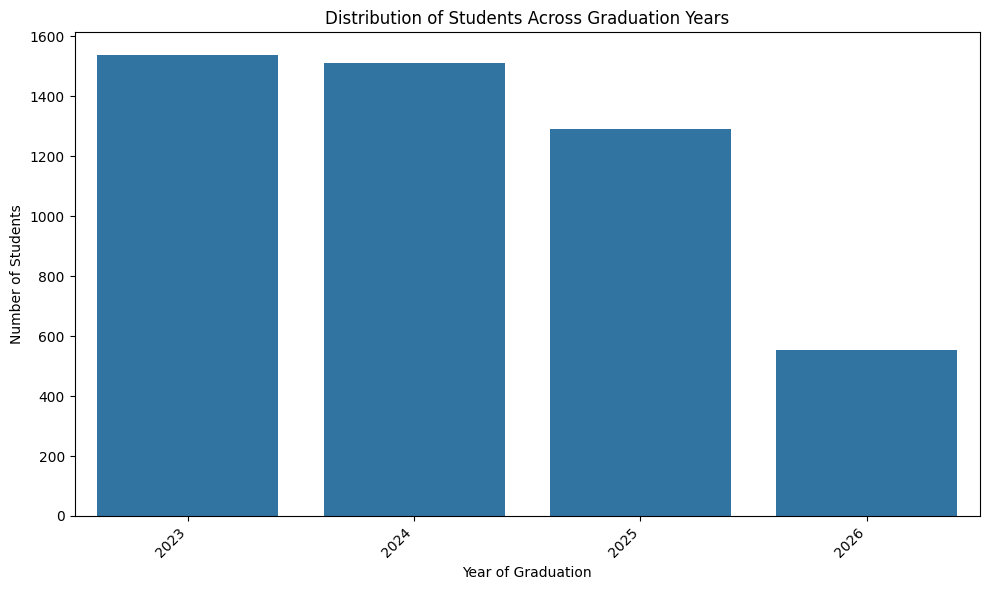

In [7]:
# Count the occurrences of each graduation year
graduation_year_counts = df['Year of Graduation'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=graduation_year_counts.index, y=graduation_year_counts.values)
plt.title('Distribution of Students Across Graduation Years')
plt.xlabel('Year of Graduation')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

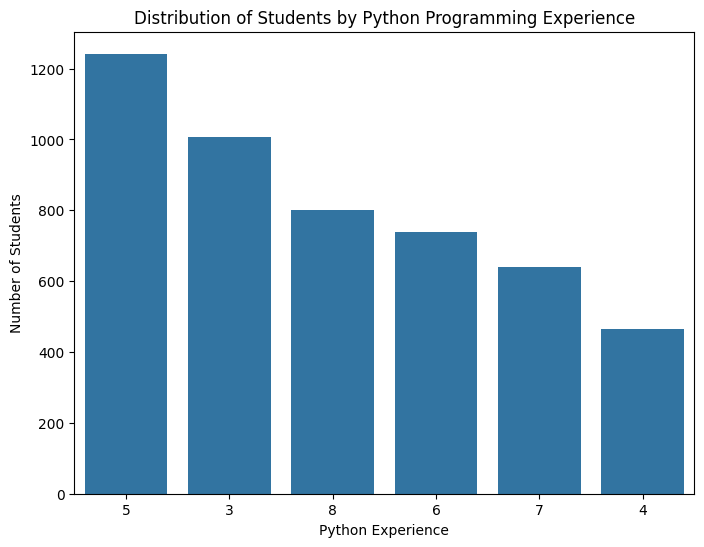

In [8]:
# Distribution of student's experience with Python programming
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Experience with python (Months)', order=df['Experience with python (Months)'].value_counts().index)
plt.title('Distribution of Students by Python Programming Experience')
plt.xlabel('Python Experience')
plt.ylabel('Number of Students')
plt.show()

In [9]:
# Function to convert income ranges to numerical values (midpoints of ranges)
def income_to_numeric(income_range):
    if income_range == '0-2 Lakh':
        return 1  # Midpoint of 0-2 Lakh
    elif income_range == '2-5 Lakh':
        return 3.5  # Midpoint of 2-5 Lakh
    elif income_range == '5-7 Lakh':
        return 6  # Midpoint of 5-7 Lakh
    elif income_range == '7 Lakh+':
        return 8  # Assuming 8 Lakh as a representative value for 7 Lakh+
    else:
        return None # Handle any other cases

# Apply the function to the 'Family Income' column
df['Family Income Numeric'] = df['Family Income'].apply(income_to_numeric)

# Calculate the average family income using the new numeric column
average_family_income = df['Family Income Numeric'].mean()

print(f"Average Family Income (in Lakhs): {average_family_income}")

Average Family Income (in Lakhs): 1.3111973845525133


Top 5 Colleges by Average CGPA:
College Name
THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER DEVELOPMENT & RESEARCH - [TIMSCDR]    8.585714
St Xavier's College                                                                  8.578571
B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan                 8.456410
Symbiosis Institute of Technology, Pune                                              8.303448
AP SHAH INSTITUTE OF TECHNOLOGY                                                      8.283333
Name: CGPA, dtype: float64


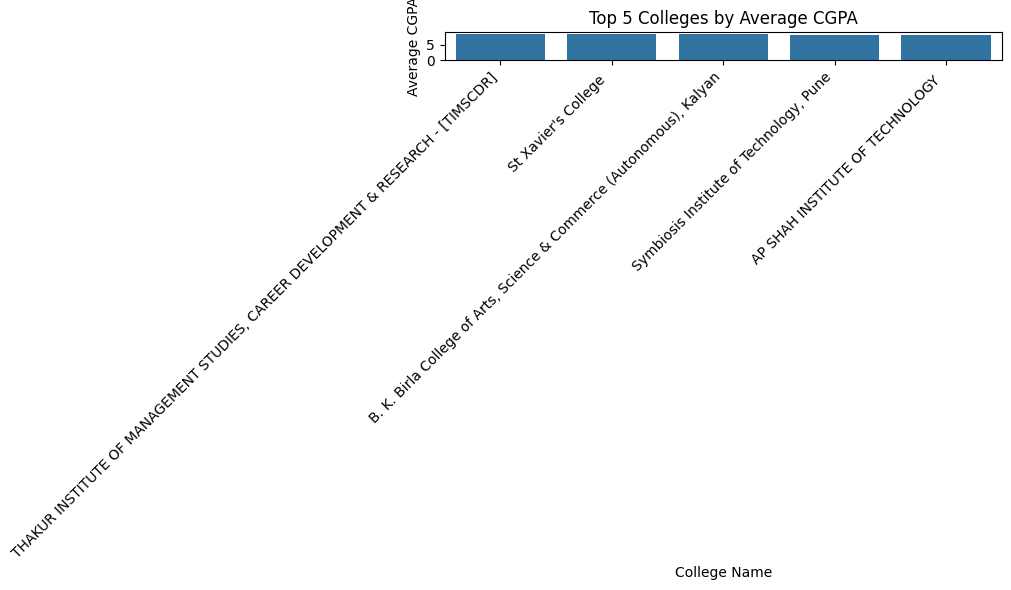

In [10]:
# Group by 'College Name' and calculate the mean 'CGPA' for each college
college_cgpa = df.groupby('College Name')['CGPA'].mean().sort_values(ascending=False)
# Select the top 5 colleges
top_5_colleges_cgpa = college_cgpa.head(5)
# Print the top 5 results
print("Top 5 Colleges by Average CGPA:")
print(top_5_colleges_cgpa)
# Create a bar plot of the top 5 colleges
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_colleges_cgpa.index, y=top_5_colleges_cgpa.values)
plt.title('Top 5 Colleges by Average CGPA')
plt.xlabel('College Name')
plt.ylabel('Average CGPA')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Outliers in 'Quantity' attribute:


,First Name,Email ID,Quantity,Events,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,City,CGPA,Experience with python (Months),Family Income,Expected salary (Lac),Leadership- skills,Family Income Numeric


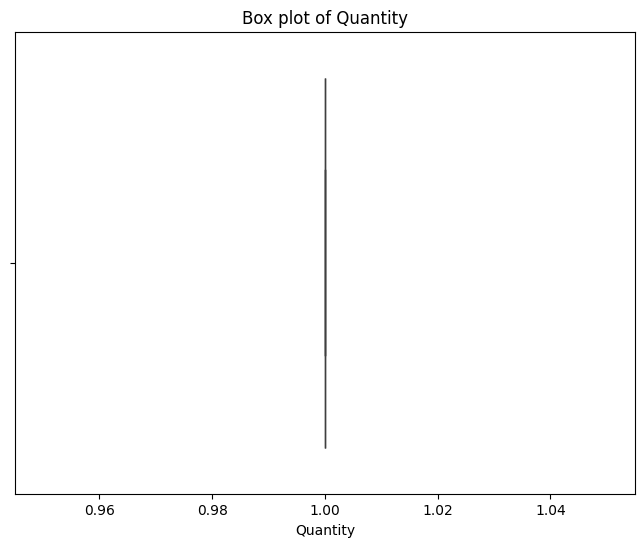

In [11]:
# Find outliers in the 'Quantity' attribute using the Interquartile Range (IQR) method
if 'Quantity' in df.columns:
  Q1 = df['Quantity'].quantile(0.25)
  Q3 = df['Quantity'].quantile(0.75)
  IQR = Q3 - Q1

  # Define the lower and upper bounds for outlier detection
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Identify outliers
  outliers = df[(df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)]

  print("\nOutliers in 'Quantity' attribute:")
  display(outliers)

  # Optional: Visualize the distribution and outliers using a box plot
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df['Quantity'])
  plt.title('Box plot of Quantity')
  plt.xlabel('Quantity')
  plt.show()
else:
  print("The 'Quantity' column was not found in the DataFrame.")

Average CGPA of students from each city:
City
Kolhapur     8.557143
Raipur       8.507143
Sonipat      8.464286
Gurugram     8.459259
Puri         8.450000
               ...   
Panipat      7.615385
Nashik       7.592857
Daman        7.421429
Rewari       7.392308
New Delhi    7.307143
Name: CGPA, Length: 177, dtype: float64


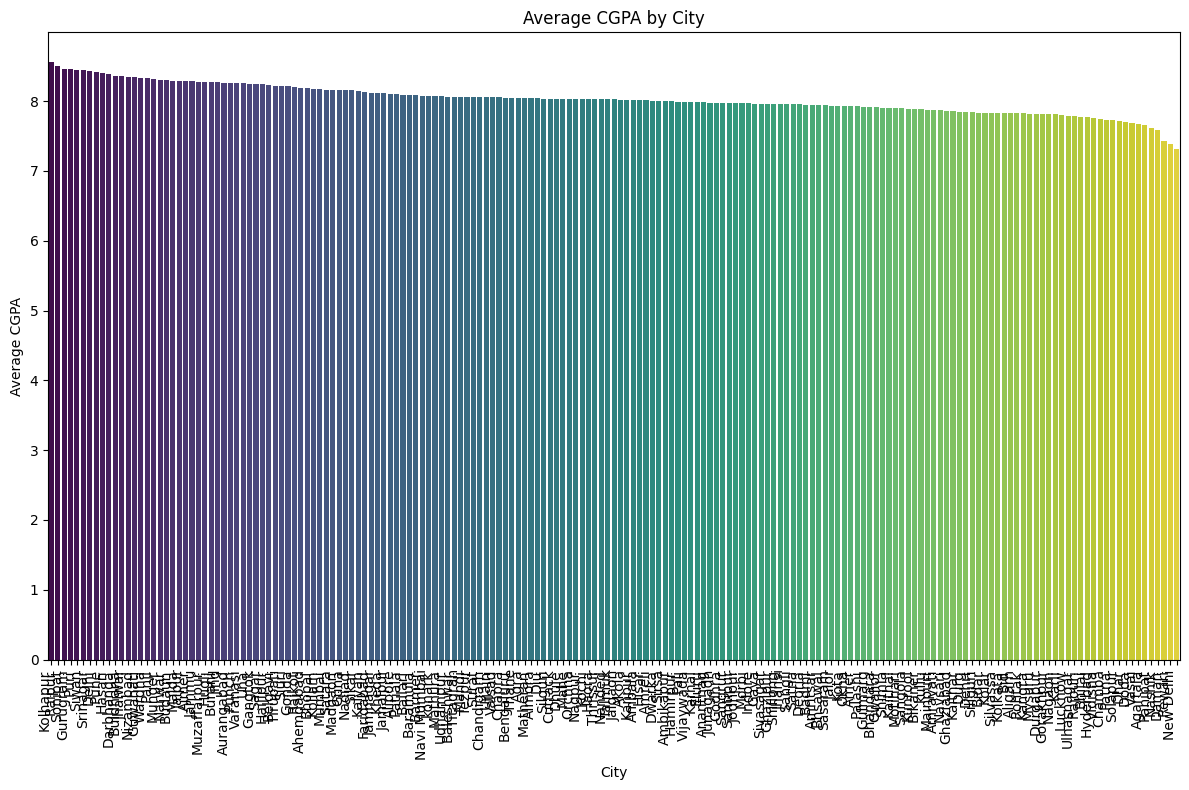

In [12]:
# Group by 'City' and calculate the mean 'CGPA' for each city
city_cgpa = df.groupby('City')['CGPA'].mean().sort_values(ascending=False)

# Print the average CGPA for each city
print("Average CGPA of students from each city:")
print(city_cgpa)

# Create a bar plot for the average CGPA per city (can be many cities, consider top N if needed)
# For demonstration, plotting all cities
plt.figure(figsize=(12, 8))
sns.barplot(x=city_cgpa.index, y=city_cgpa.values, palette='viridis')
plt.title('Average CGPA by City')
plt.xlabel('City')
plt.ylabel('Average CGPA')
plt.xticks(rotation=90, ha='right') # Rotate labels for readability if many cities
plt.tight_layout()
plt.show()


Correlation between Family Income and CGPA: 0.02


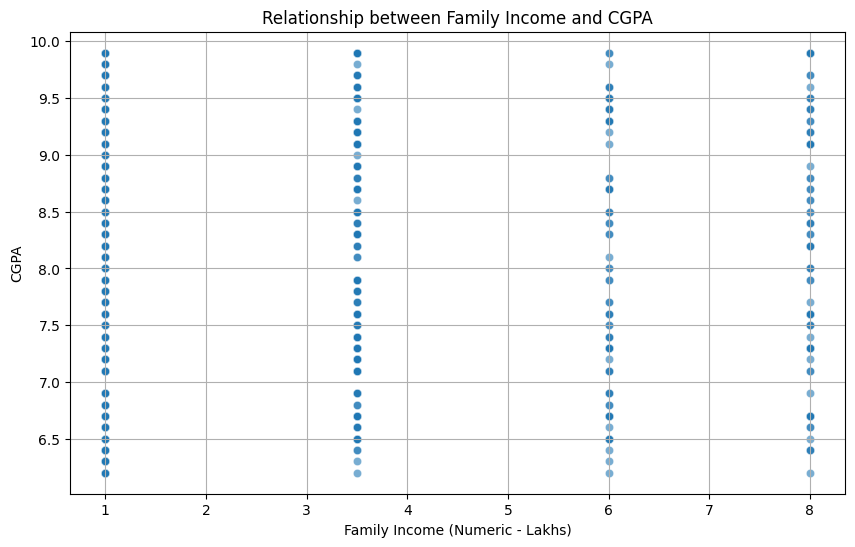

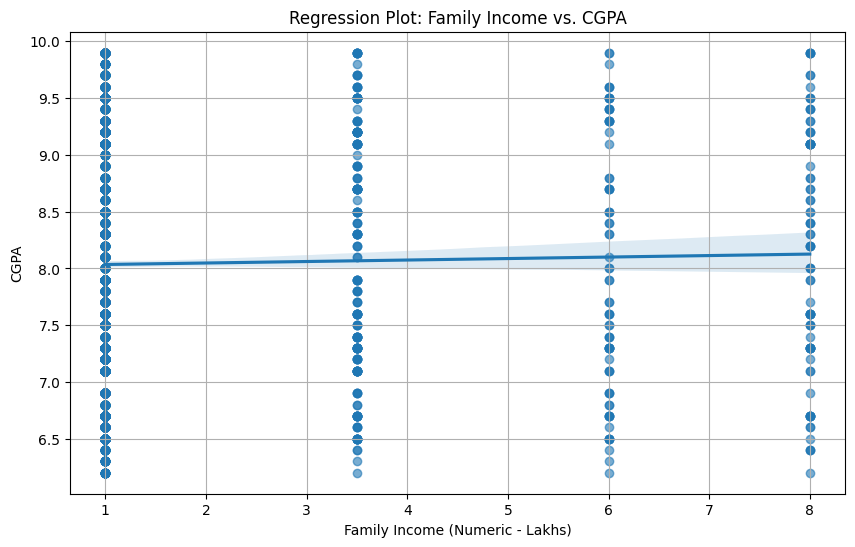

In [15]:
# Calculate the correlation between 'Family Income Numeric' and 'CGPA'
correlation = df['Family Income Numeric'].corr(df['CGPA'])

print(f"\nCorrelation between Family Income and CGPA: {correlation:.2f}")

# Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Family Income Numeric', y='CGPA', alpha=0.6)
plt.title('Relationship between Family Income and CGPA')
plt.xlabel('Family Income (Numeric - Lakhs)')
plt.ylabel('CGPA')
plt.grid(True)
plt.show()

# You can also use a regression plot to see the trend
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Family Income Numeric', y='CGPA', scatter_kws={'alpha':0.6})
plt.title('Regression Plot: Family Income vs. CGPA')
plt.xlabel('Family Income (Numeric - Lakhs)')
plt.ylabel('CGPA')
plt.grid(True)
plt.show()

# Interpretation of the correlation coefficient:
# - A value close to 1 indicates a strong positive linear relationship.
# - A value close to -1 indicates a strong negative linear relationship.
# - A value close to 0 indicates a weak or no linear relationship.

# Note: Correlation does not imply causation.

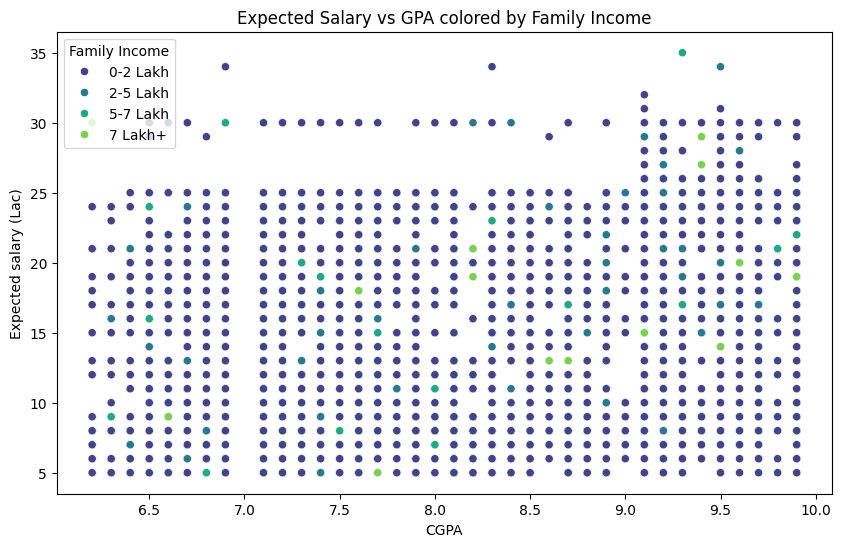

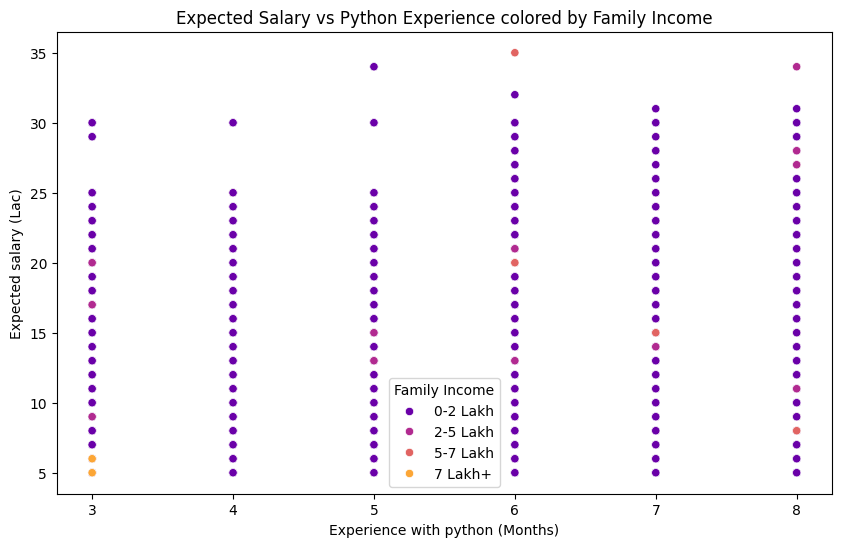

In [16]:
salary_analysis = df[['Expected salary (Lac)', 'CGPA', 'Family Income', 'Experience with python (Months)']].dropna()

# Convert Family Income into ordered category
income_order = ['0-2 Lakh', '2-5 Lakh', '5-7 Lakh', '7 Lakh+']
salary_analysis['Family Income'] = pd.Categorical(salary_analysis['Family Income'], categories=income_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=salary_analysis, x='CGPA', y='Expected salary (Lac)', hue='Family Income', palette='viridis')
plt.title("Expected Salary vs GPA colored by Family Income")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=salary_analysis, x='Experience with python (Months)', y='Expected salary (Lac)', hue='Family Income', palette='plasma')
plt.title("Expected Salary vs Python Experience colored by Family Income")
plt.show()

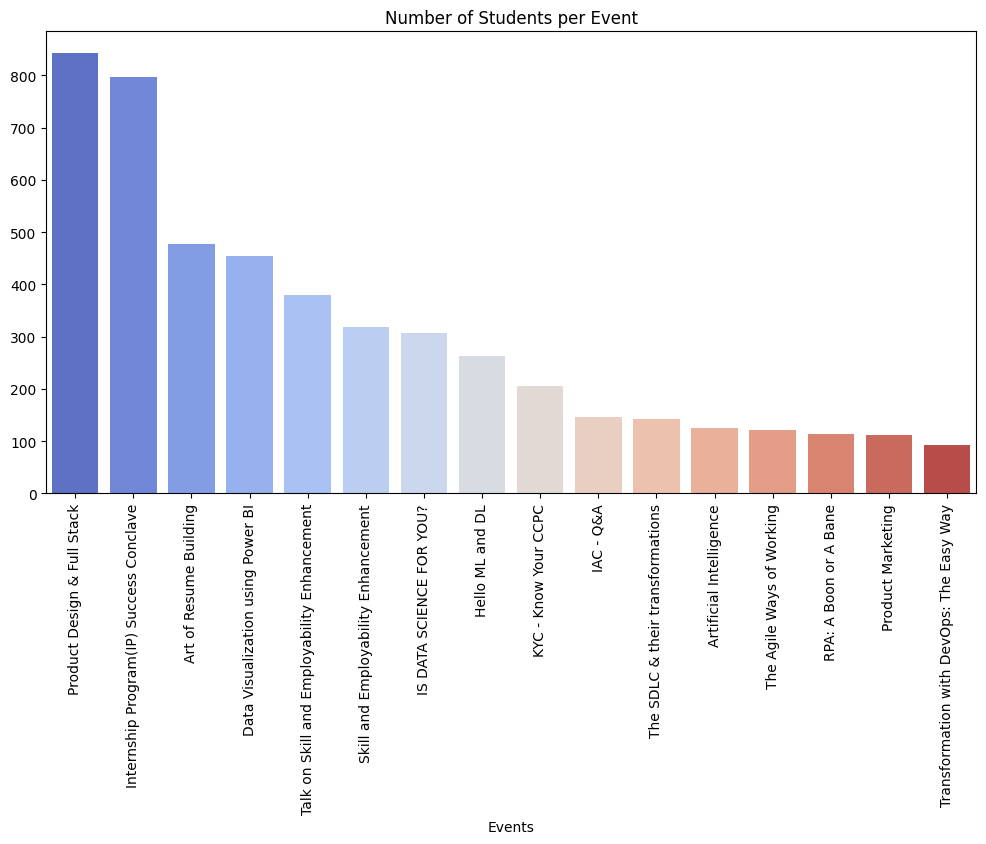

In [17]:
event_counts = df['Events'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=event_counts.index, y=event_counts.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Number of Students per Event")
plt.show()

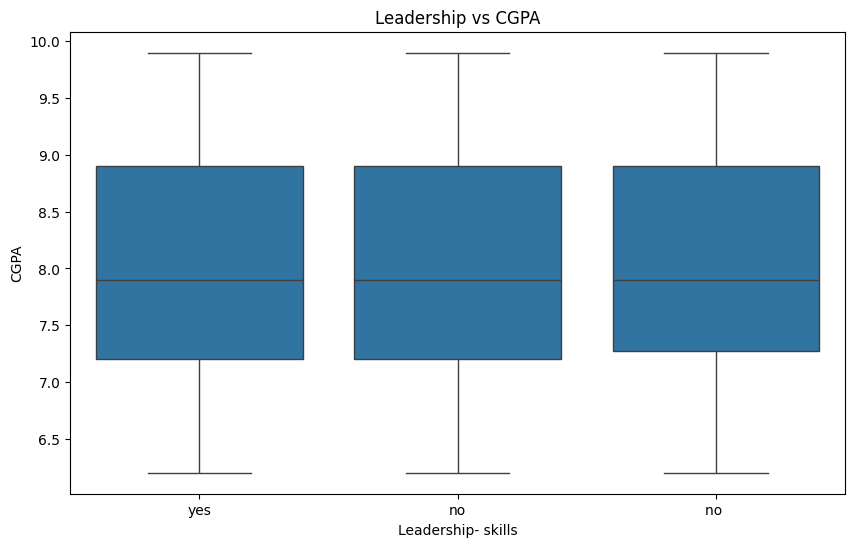

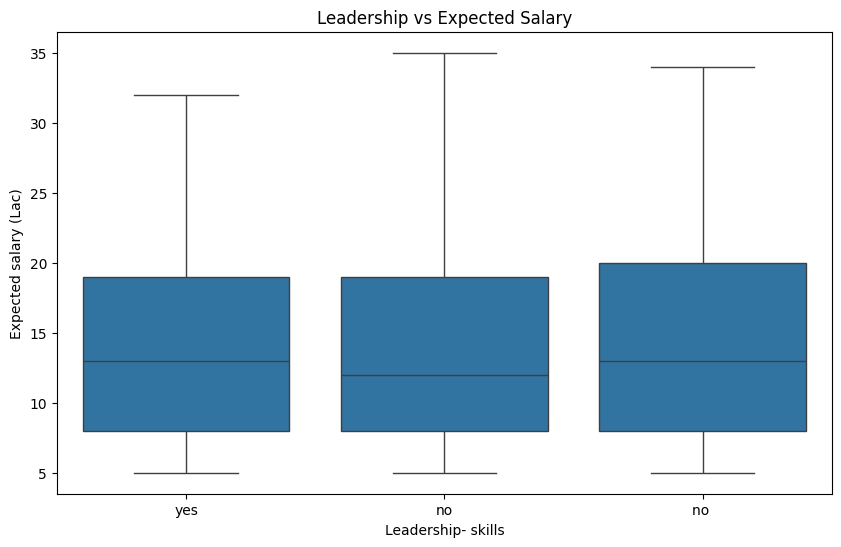

In [18]:
leadership = df[['Leadership- skills', 'CGPA', 'Expected salary (Lac)']].dropna()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Leadership- skills', y='CGPA', data=leadership)
plt.title("Leadership vs CGPA")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Leadership- skills', y='Expected salary (Lac)', data=leadership)
plt.title("Leadership vs Expected Salary")
plt.show()

In [19]:
graduates_2024 = df[df['Year of Graduation'] <= 2024]
print(f"Total students graduating by end of 2024: {graduates_2024.shape[0]}")


Total students graduating by end of 2024: 3047


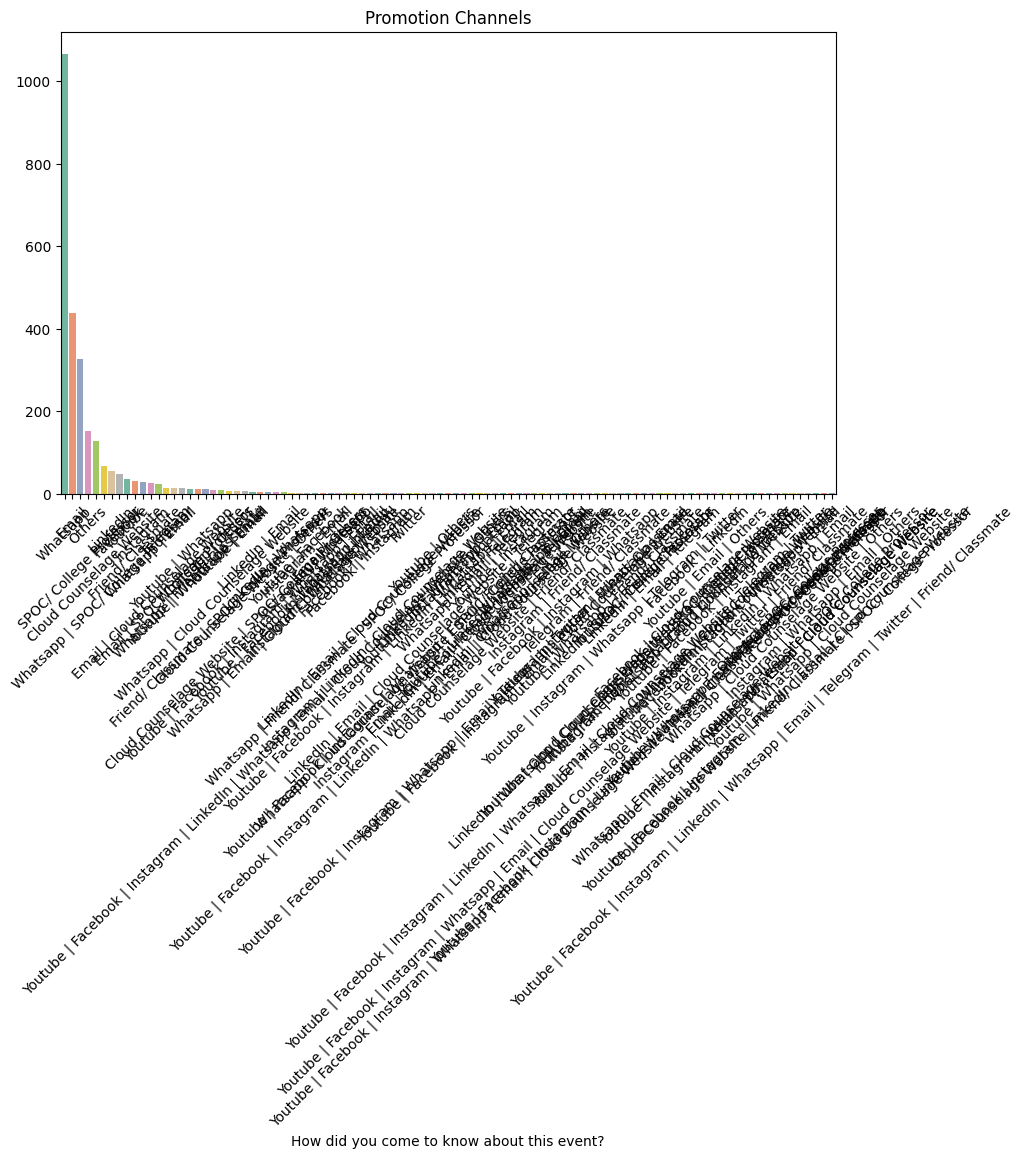

In [20]:
promotion_counts = df['How did you come to know about this event?'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=promotion_counts.index, y=promotion_counts.values, palette='Set2')
plt.xticks(rotation=45)
plt.title("Promotion Channels")
plt.show()

In [21]:
ds_keywords = ['Data Science', 'Python', 'AI', 'Machine Learning']
ds_events = df[df['Events'].str.contains('|'.join(ds_keywords), case=False, na=False)]
print(f"Total students attended Data Science related events: {ds_events.shape[0]}")

Total students attended Data Science related events: 306


In [22]:
high_cgpa_exp = df[(df['CGPA'] >= 8) & (df['Experience with python (Months)'] >= 6)]
avg_salary = high_cgpa_exp['Expected salary (Lac)'].mean()
print(f"Average salary for high CGPA & Python experience students: {avg_salary:.2f} LPA")

Average salary for high CGPA & Python experience students: 16.72 LPA


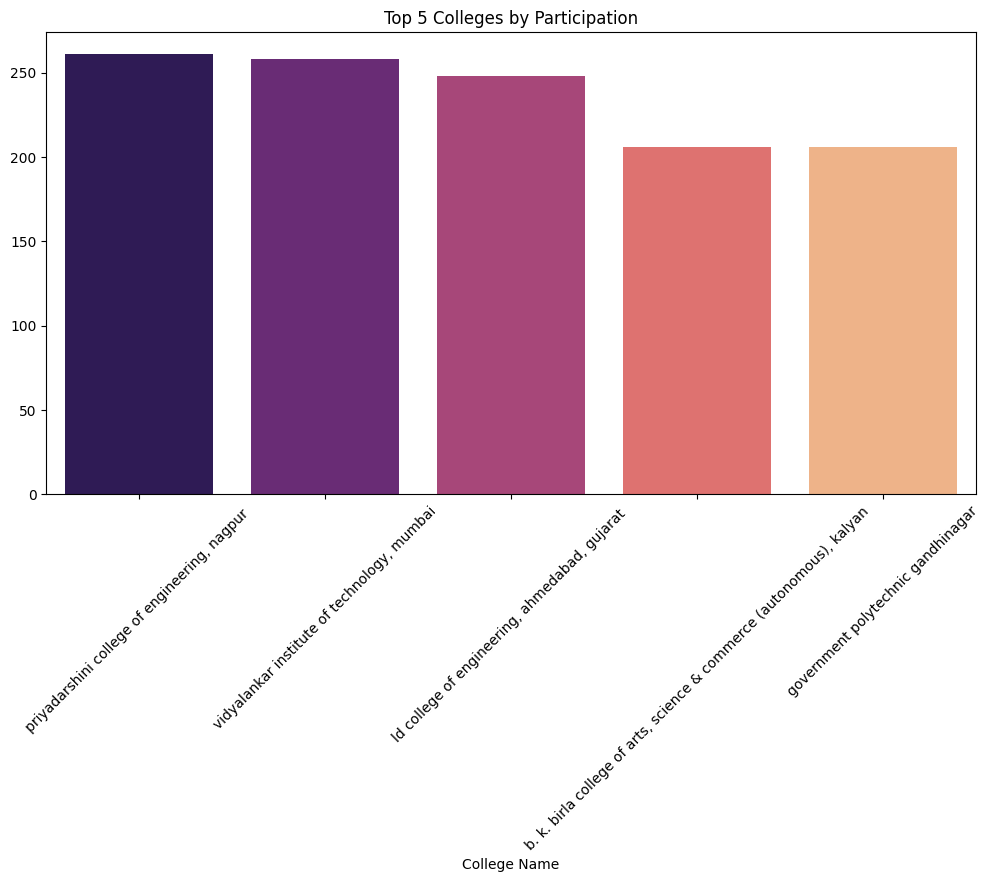


Top 5 Colleges:
 College Name
priyadarshini college of engineering, nagpur                            261
vidyalankar institute of technology, mumbai                             258
ld college of engineering, ahmedabad, gujarat                           248
b. k. birla college of arts, science & commerce (autonomous), kalyan    206
government polytechnic gandhinagar                                      206
Name: count, dtype: int64


In [23]:
college_counts = df['College Name'].value_counts().head(5)
plt.figure(figsize=(12, 6))
sns.barplot(x=college_counts.index, y=college_counts.values, palette='magma')
plt.xticks(rotation=45)
plt.title("Top 5 Colleges by Participation")
plt.show()

print("\nTop 5 Colleges:\n", college_counts)